In [1]:
import pandas as pd

# Cargar datos
df = pd.read_csv("tripadvisor_entropy.csv")

In [2]:
def classify_by_rating(rating):
    if rating <= 3:
        return "negative"
    else:
        return "positive"

In [3]:
# Aplicar clasificación basada en Rating
df['Sentiment'] = df['Rating'].apply(classify_by_rating)

In [4]:
df

,Review,Rating,train,Sentiment
0,nice hotel expensive parking got good deal sta...,4,False,positive
1,ok nothing special charge diamond member hilto...,2,False,negative
2,nice rooms not 4* experience hotel monaco seat...,3,False,negative
3,"unique, great stay, wonderful time hotel monac...",5,False,positive
4,"great stay great stay, went seahawk game aweso...",5,False,positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,False,positive
20487,great location price view hotel great quick pl...,4,False,positive
20488,"ok just looks nice modern outside, desk staff ...",2,False,negative
20489,hotel theft ruined vacation hotel opened sept ...,1,False,negative


In [5]:
train_df = df[df["train"] == True]
test_df = df[df["train"] == False]

In [6]:
# Mostrar distribución de clases
print("\nDistribución de sentimientos basados en Rating (conjunto de entrenamiento):")
print(train_df['Sentiment'].value_counts())


Distribución de sentimientos basados en Rating (conjunto de entrenamiento):
Sentiment
negative    300
positive    150
Name: count, dtype: int64


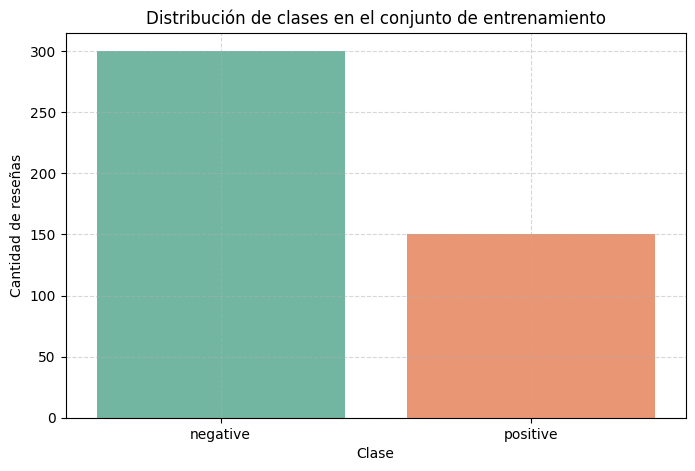

In [7]:
# Graficar distribución de clases
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sentiment', palette="Set2",hue="Sentiment")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Cantidad de reseñas")
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [8]:
# Diccionario de contracciones adicionales
custom_contractions = {
    "u": "you",
    "ur": "your",
    "checkin": "check in",
    "checkout": "check out",
    "nothin'": "nothing",
    "im": "i am",
    "thats": "that is",
    "whats": "what is",
    "dont": "do not",
    "didnt": "did not",
    "couldnt": "could not",
    "wifey": "wife",
    "n't" : "can not",
    "can't" : "can not"
}

In [9]:
import contractions
import re

def expand_contractions(text):
    if not isinstance(text, str):
        return ""
    expanded_text = contractions.fix(text)

    # Agrega expansión personalizada
    for word, replacement in custom_contractions.items():
        expanded_text = re.sub(r'\b' + re.escape(word) + r'\b', replacement, expanded_text, flags=re.IGNORECASE)
    

    expanded_text = re.sub(r'\s+', ' ', expanded_text).strip()
    return expanded_text

In [10]:
words_to_keep = {
        'not', 'no', 'nor', 'never', 'none',  # Negaciones
        'very', 'really', 'too', 'extremely',  # Intensidad
        'but', 'however', 'although', 'yet',   # Contraste
        'like', 'love', 'hate', 'dislike',    # Opinión
        'think', 'believe', 'know', 'feel',   # Pensamiento
        'can'
    }

In [11]:
custom_stopwords = ["hotel", "hotels", "room", "rooms","restaurant","floor","reception","day", "stay","night"] 

In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

def preprocess_text(text, custom_stopwords=None):

    # Corregir "ca n't" -> "can't"
    text = re.sub(r'\bca n\'t\b', "can't", text, flags=re.IGNORECASE)

    # Corregir "wo n't" -> "can't"
    text = re.sub(r'\bwo n\'t\b', "won't", text, flags=re.IGNORECASE)

    text = re.sub(r'([.,!?;:])([a-zA-Z])', r'\1 \2', text)
    text = re.sub(r'([.,!?;:])([a-zA-Z])', r'\1 \2', text)

    text = expand_contractions(text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminar puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Eliminar stopwords (incluyendo personalizadas)
    stop_words = set(stopwords.words('english'))

    
    if custom_stopwords:
        custom_stopwords_lower = [word.lower() for word in custom_stopwords]  # Asegurar minúsculas
        stop_words.update(custom_stopwords_lower)

    stop_words -= words_to_keep
    
    # if custom_stopwords:
    #     stop_words.update(custom_stopwords)
        
    tokens = [token for token in tokens if token not in stop_words]

     # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

def preprocess_text_normal(text, custom_stopwords=None):

    # Corregir "ca n't" -> "can't"
    text = re.sub(r'\bca n\'t\b', "can't", text, flags=re.IGNORECASE)

    text = expand_contractions(text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminar puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Eliminar stopwords (incluyendo personalizadas)
    stop_words = set(stopwords.words('english'))
    
    if custom_stopwords:
        stop_words.update(custom_stopwords)
        
    tokens = [token for token in tokens if token not in stop_words]
    
    return tokens

In [14]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

def preprocess_text_keep_stopwords(text, custom_stopwords=None):

    # Corregir "ca n't" -> "can't"
    text = re.sub(r'\bca n\'t\b', "can't", text, flags=re.IGNORECASE)

    # Paso 1: Expandir contracciones
    text = expand_contractions(text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Tokenización
    tokens = word_tokenize(text)
    
    # Eliminar puntuación
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()

    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    
    # No eliminamos stopwords en esta versión
    return tokens

In [15]:
texto = "Emily and Harry were sitting in the room park. In México not visit. I didn’t like the product?. The product is not good. can't.Room does doesn't.room"

In [16]:
texto = 'good location hotel hotels located, rooms quite cozy comfy bed, bathroom fine said toilet flush really noisy likely wake half middle night.we did door adjcent room really gotdisturbed night door antics quick phone reception 3am soon sorted, real grip attitude reception desk manager forget charm brick, welcoming terribly polite having just arrived seattle vancouver shocked disappointed welcometo city, tip hotel management send guyon charm course maybe just somebody, ok hotel convenient town.cheers,  '


In [17]:
print(preprocess_text_normal(texto))

['good', 'location', 'hotel', 'hotel', 'located', 'room', 'quite', 'cozy', 'comfy', 'bed', 'bathroom', 'fine', 'said', 'toilet', 'flush', 'really', 'noisy', 'likely', 'wake', 'half', 'middle', 'night.we', 'door', 'adjcent', 'room', 'really', 'gotdisturbed', 'night', 'door', 'antic', 'quick', 'phone', 'reception', '3am', 'soon', 'sorted', 'real', 'grip', 'attitude', 'reception', 'desk', 'manager', 'forget', 'charm', 'brick', 'welcoming', 'terribly', 'polite', 'arrived', 'seattle', 'vancouver', 'shocked', 'disappointed', 'welcometo', 'city', 'tip', 'hotel', 'management', 'send', 'guyon', 'charm', 'course', 'maybe', 'somebody', 'ok', 'hotel', 'convenient', 'town.cheers']


In [18]:
print(preprocess_text(texto,custom_stopwords))

['good', 'location', 'located', 'quite', 'cozy', 'comfy', 'bed', 'bathroom', 'fine', 'said', 'toilet', 'flush', 'really', 'noisy', 'likely', 'wake', 'half', 'middle', 'door', 'adjcent', 'really', 'gotdisturbed', 'door', 'antic', 'quick', 'phone', '3am', 'soon', 'sorted', 'real', 'grip', 'attitude', 'desk', 'manager', 'forget', 'charm', 'brick', 'welcoming', 'terribly', 'polite', 'arrived', 'seattle', 'vancouver', 'shocked', 'disappointed', 'welcometo', 'city', 'tip', 'management', 'send', 'guyon', 'charm', 'course', 'maybe', 'somebody', 'ok', 'convenient', 'town', 'cheer']


In [19]:
print(preprocess_text(texto))

['good', 'location', 'hotel', 'hotel', 'located', 'room', 'quite', 'cozy', 'comfy', 'bed', 'bathroom', 'fine', 'said', 'toilet', 'flush', 'really', 'noisy', 'likely', 'wake', 'half', 'middle', 'night', 'door', 'adjcent', 'room', 'really', 'gotdisturbed', 'night', 'door', 'antic', 'quick', 'phone', 'reception', '3am', 'soon', 'sorted', 'real', 'grip', 'attitude', 'reception', 'desk', 'manager', 'forget', 'charm', 'brick', 'welcoming', 'terribly', 'polite', 'arrived', 'seattle', 'vancouver', 'shocked', 'disappointed', 'welcometo', 'city', 'tip', 'hotel', 'management', 'send', 'guyon', 'charm', 'course', 'maybe', 'somebody', 'ok', 'hotel', 'convenient', 'town', 'cheer']


In [20]:
print(preprocess_text_keep_stopwords(texto))

['good', 'location', 'hotel', 'hotel', 'located', 'room', 'quite', 'cozy', 'comfy', 'bed', 'bathroom', 'fine', 'said', 'toilet', 'flush', 'really', 'noisy', 'likely', 'wake', 'half', 'middle', 'night.we', 'did', 'door', 'adjcent', 'room', 'really', 'gotdisturbed', 'night', 'door', 'antic', 'quick', 'phone', 'reception', '3am', 'soon', 'sorted', 'real', 'grip', 'attitude', 'reception', 'desk', 'manager', 'forget', 'charm', 'brick', 'welcoming', 'terribly', 'polite', 'having', 'just', 'arrived', 'seattle', 'vancouver', 'shocked', 'disappointed', 'welcometo', 'city', 'tip', 'hotel', 'management', 'send', 'guyon', 'charm', 'course', 'maybe', 'just', 'somebody', 'ok', 'hotel', 'convenient', 'town.cheers']


In [21]:
reviews_train = train_df['Review']
sentiments_train = train_df['Sentiment']

In [22]:
reviews_train

76       stay clear, internet reservation friday rang h...
80       priority award floor, 32 member hilton honors ...
158      good location hotel located, rooms quite cozy ...
163      not designed business stayed 2 nights executiv...
171      better just got week seattle loved minute, pac...
                               ...                        
20236    love club not beach left halifax april 7th sta...
20274    great location reasonable hotel, stayed hotel ...
20347    better expected husband daughter niece stayed ...
20383    great hotel great location florence great old ...
20427    absolute value money hotel offers fantastic va...
Name: Review, Length: 450, dtype: object

In [23]:
reviews_train[158]

'good location hotel located, rooms quite cozy comfy bed, bathroom fine said toilet flush really noisy likely wake half middle night.we did door adjcent room really gotdisturbed night door antics quick phone reception 3am soon sorted, real grip attitude reception desk manager forget charm brick, welcoming terribly polite having just arrived seattle vancouver shocked disappointed welcometo city, tip hotel management send guyon charm course maybe just somebody, ok hotel convenient town.cheers,  '

In [24]:
reviews_train = reviews_train.apply(preprocess_text,custom_stopwords=custom_stopwords)

In [25]:
#mostrar primer elemnto de reviews_train
reviews_train[158]

['good',
 'location',
 'located',
 'quite',
 'cozy',
 'comfy',
 'bed',
 'bathroom',
 'fine',
 'said',
 'toilet',
 'flush',
 'really',
 'noisy',
 'likely',
 'wake',
 'half',
 'middle',
 'door',
 'adjcent',
 'really',
 'gotdisturbed',
 'door',
 'antic',
 'quick',
 'phone',
 '3am',
 'soon',
 'sorted',
 'real',
 'grip',
 'attitude',
 'desk',
 'manager',
 'forget',
 'charm',
 'brick',
 'welcoming',
 'terribly',
 'polite',
 'arrived',
 'seattle',
 'vancouver',
 'shocked',
 'disappointed',
 'welcometo',
 'city',
 'tip',
 'management',
 'send',
 'guyon',
 'charm',
 'course',
 'maybe',
 'somebody',
 'ok',
 'convenient',
 'town',
 'cheer']

In [26]:
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_ngrams(tokens_list, n=2, top_n=20, title="Top N-gramas", color="Blues"):
    ngrams_list = list(ngrams(tokens_list, n))
    ngram_counts = Counter(ngrams_list)
    
    df_ngrams = pd.DataFrame(ngram_counts.most_common(top_n), columns=['ngram', 'count'])
    df_ngrams['ngram'] = df_ngrams['ngram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_ngrams, x='count', y='ngram', palette=color, orient='h', hue='ngram', legend=False)
    plt.title(title)
    plt.xlabel("Frecuencia")
    plt.ylabel(f"{n}-grama")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [27]:
positive_tokens = []
negative_tokens = []

# Asumimos que reviews_train es una lista de listas de tokens (ya tokenizado)
for tokens, sentiment in zip(reviews_train, sentiments_train):
    if sentiment == "positive":
        positive_tokens.extend(tokens)  # Agrega tokens a la lista positiva
    else:
        negative_tokens.extend(tokens)  # Agrega tokens a la lista negativa

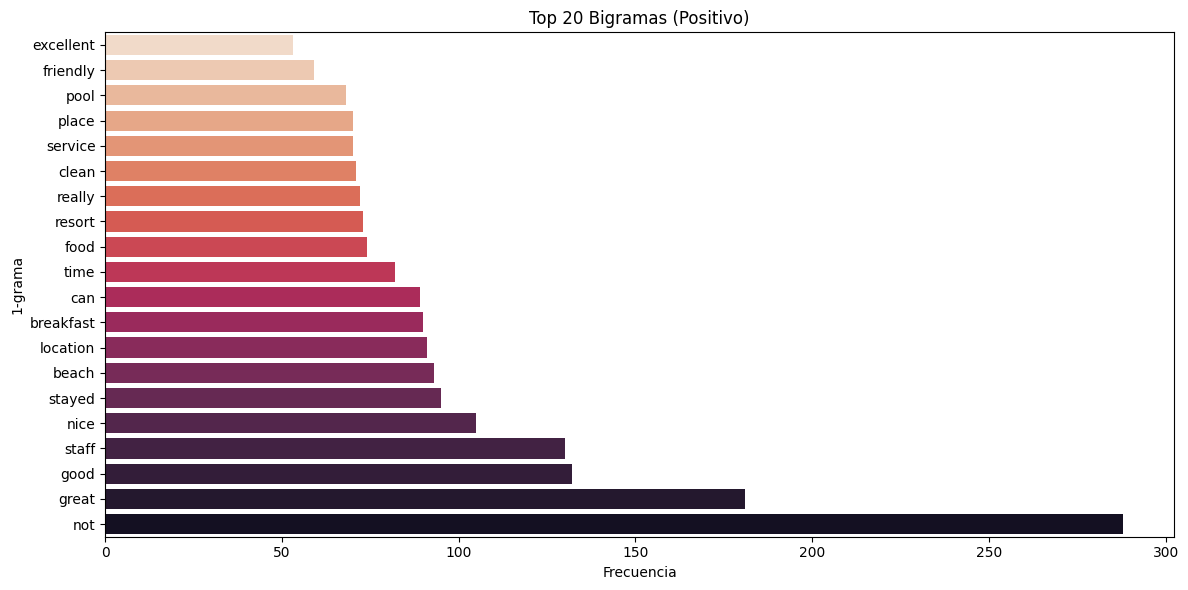

In [28]:
plot_top_ngrams(positive_tokens, n=1, top_n=20,
                title="Top 20 Bigramas (Positivo)", color="rocket")

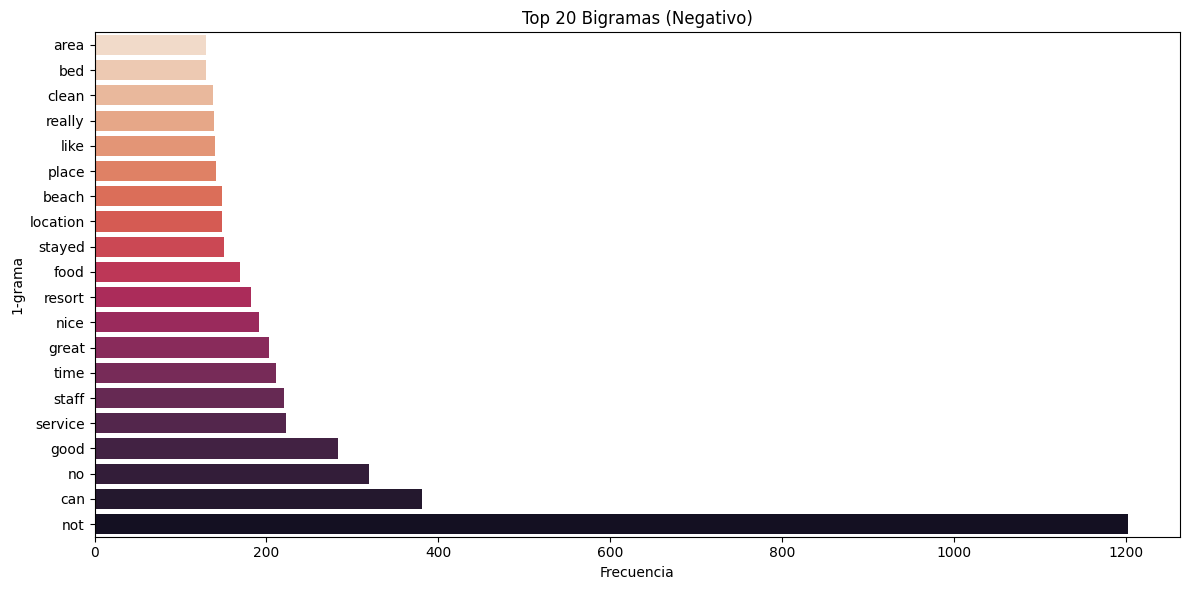

In [29]:
plot_top_ngrams(negative_tokens, n=1, top_n=20,
                title="Top 20 Bigramas (Negativo)", color="rocket")

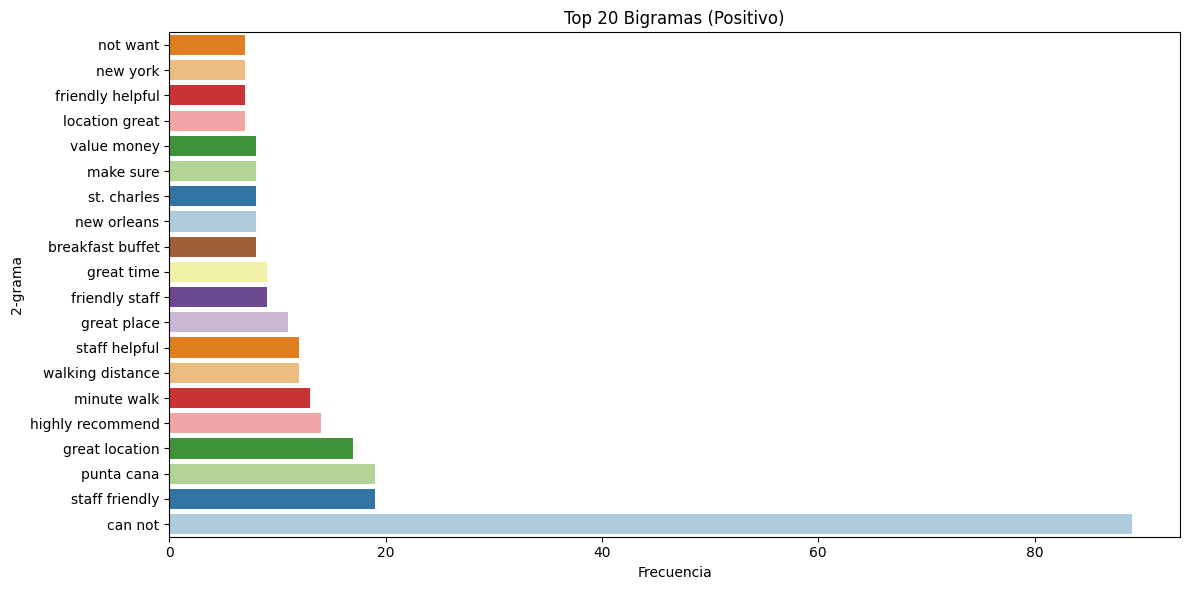

In [30]:
plot_top_ngrams(positive_tokens, n=2, top_n=20,
                title="Top 20 Bigramas (Positivo)", color="Paired")

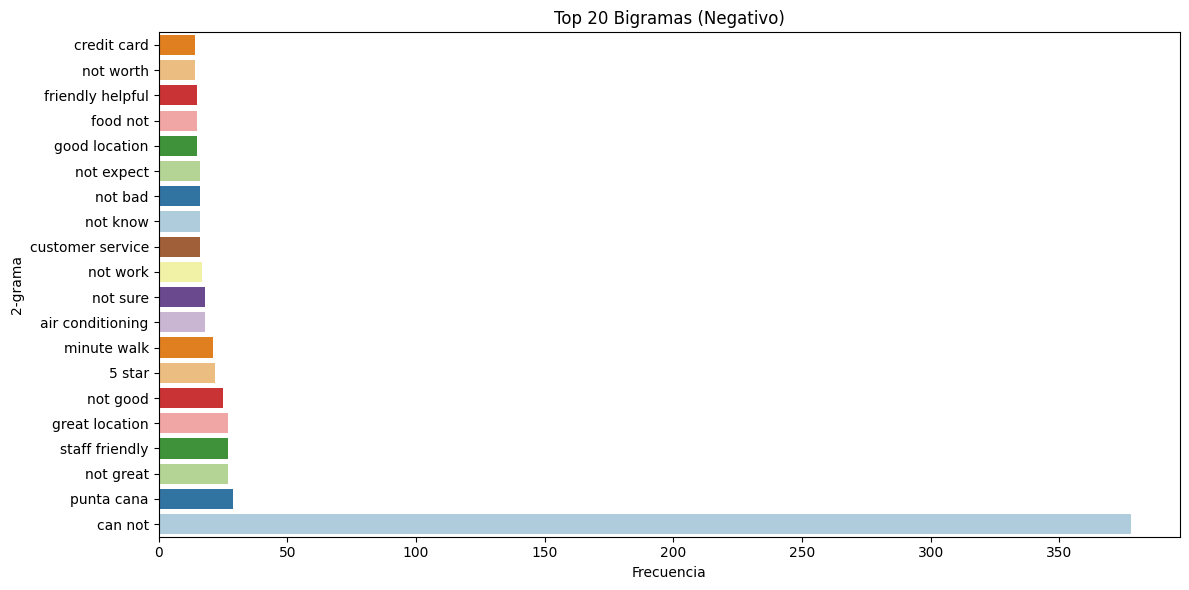

In [31]:
plot_top_ngrams(negative_tokens, n=2, top_n=20,
                title="Top 20 Bigramas (Negativo)", color="Paired")

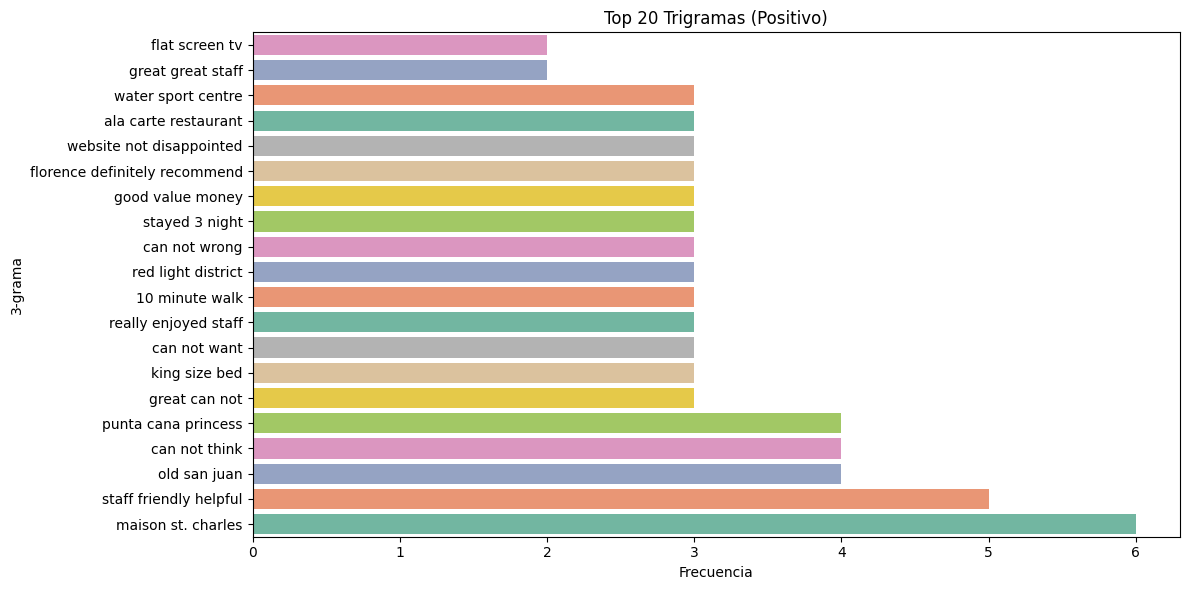

In [32]:
plot_top_ngrams(positive_tokens, n=3, top_n=20,
                title="Top 20 Trigramas (Positivo)", color="Set2")

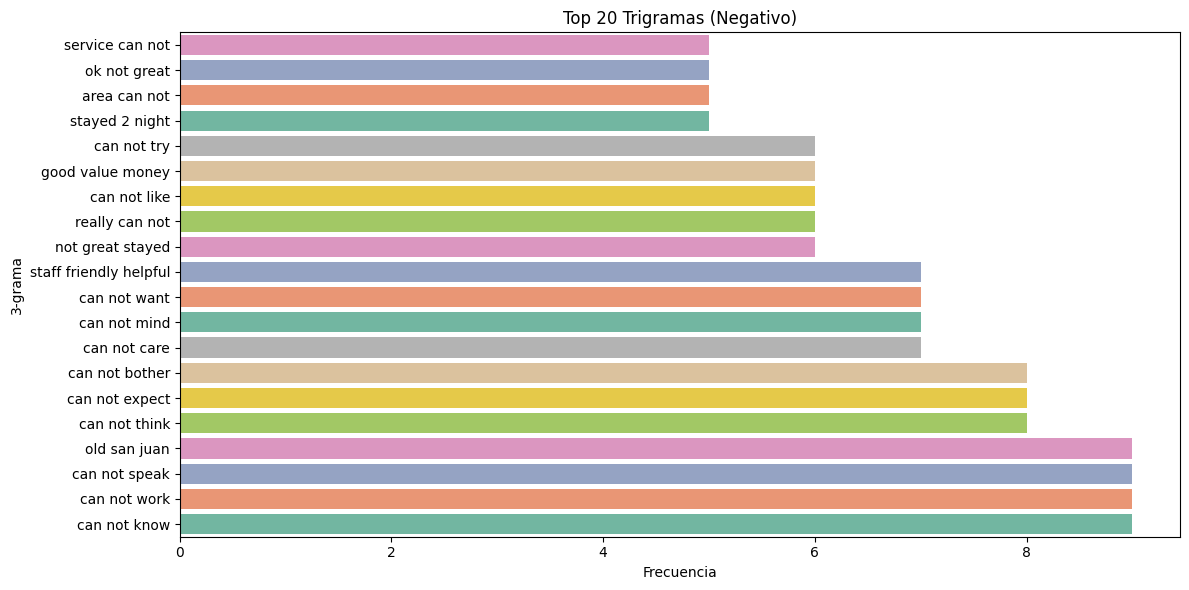

In [33]:
plot_top_ngrams(negative_tokens, n=3, top_n=20,
                title="Top 20 Trigramas (Negativo)", color="Set2")

In [34]:
from nltk import ngrams, FreqDist

# Función mejorada para n-gramas
def get_top_ngrams(token_list, n=2, top_n=50):
    n_grams = ngrams(token_list, n)
    freq_dist = FreqDist(n_grams)
    return { ' '.join(k): v for k, v in freq_dist.most_common(top_n) }

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [36]:
top_positive_unigrams = get_top_ngrams(positive_tokens, 1)
top_positive_bigrams = get_top_ngrams(positive_tokens, 2)
top_positive_trigrams = get_top_ngrams(positive_tokens, 3)

top_negative_unigrams = get_top_ngrams(negative_tokens, 1)
top_negative_bigrams = get_top_ngrams(negative_tokens, 2)
top_negative_trigrams = get_top_ngrams(negative_tokens, 3)

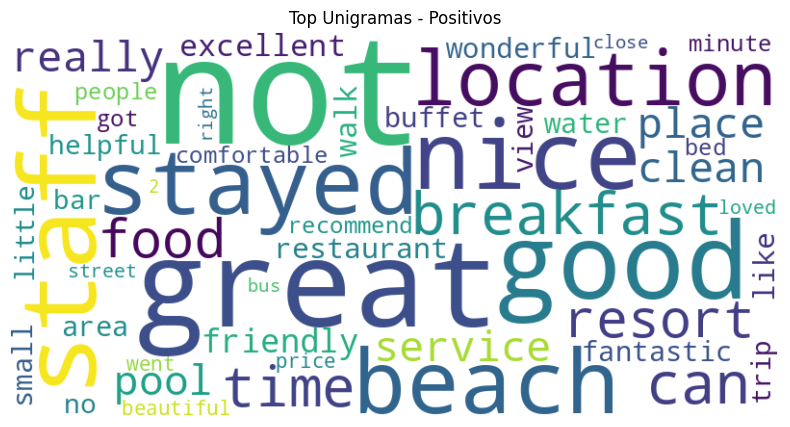

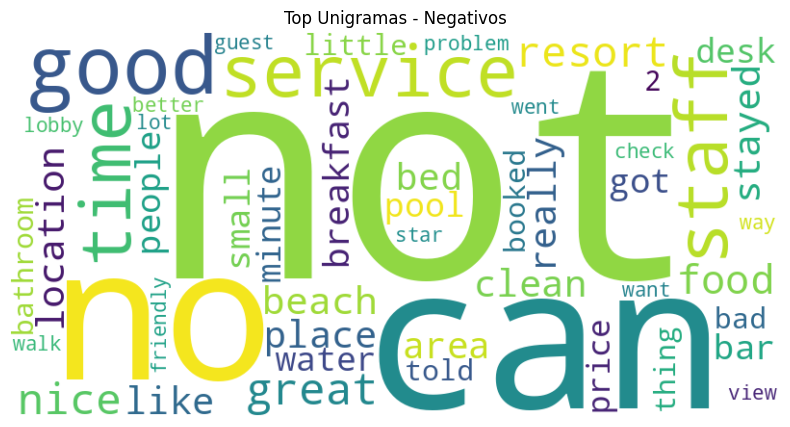

In [37]:
plot_wordcloud(top_positive_unigrams, "Top Unigramas - Positivos")
plot_wordcloud(top_negative_unigrams, "Top Unigramas - Negativos")

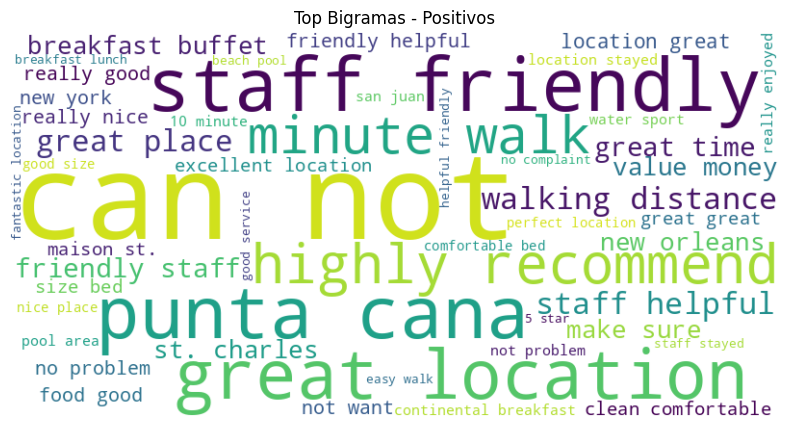

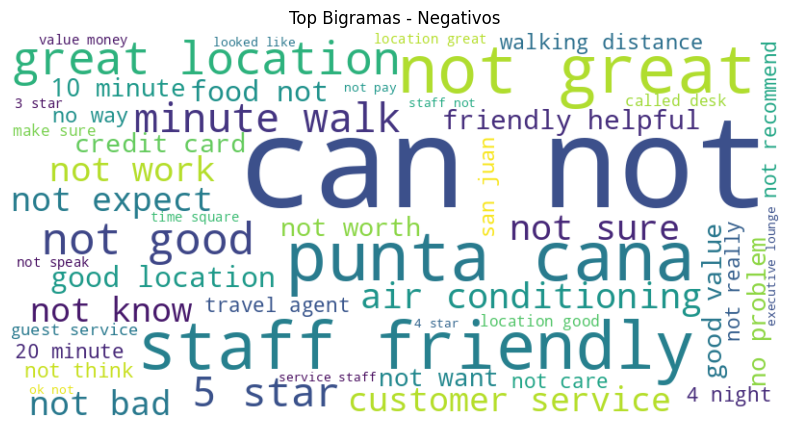

In [38]:
plot_wordcloud(top_positive_bigrams, "Top Bigramas - Positivos")
plot_wordcloud(top_negative_bigrams, "Top Bigramas - Negativos")

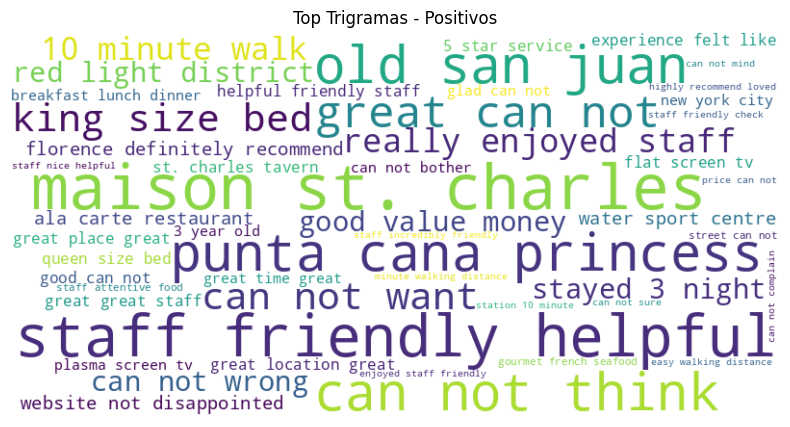

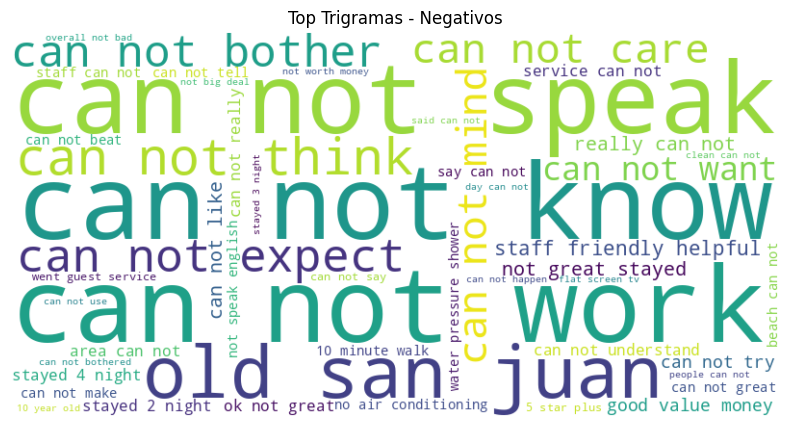

In [39]:
plot_wordcloud(top_positive_trigrams, "Top Trigramas - Positivos")
plot_wordcloud(top_negative_trigrams, "Top Trigramas - Negativos")

In [40]:
df

,Review,Rating,train,Sentiment
0,nice hotel expensive parking got good deal sta...,4,False,positive
1,ok nothing special charge diamond member hilto...,2,False,negative
2,nice rooms not 4* experience hotel monaco seat...,3,False,negative
3,"unique, great stay, wonderful time hotel monac...",5,False,positive
4,"great stay great stay, went seahawk game aweso...",5,False,positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,False,positive
20487,great location price view hotel great quick pl...,4,False,positive
20488,"ok just looks nice modern outside, desk staff ...",2,False,negative
20489,hotel theft ruined vacation hotel opened sept ...,1,False,negative


In [41]:
positive_docs = [tokens for tokens, sentiment in zip(reviews_train, sentiments_train) if sentiment == "positive"]
negative_docs = [tokens for tokens, sentiment in zip(reviews_train, sentiments_train) if sentiment == "negative"]

In [42]:
from collections import defaultdict

def calculate_word_frequencies(docs):
    word_freq = defaultdict(int)
    doc_freq = defaultdict(int)  # Número de documentos que contienen la palabra
    
    for doc in docs:
        unique_words = set(doc)
        for word in unique_words:
            doc_freq[word] += 1
        for word in doc:
            word_freq[word] += 1
            
    return word_freq, doc_freq

# Calcular frecuencias para positivos y negativos
pos_word_freq, pos_doc_freq = calculate_word_frequencies(positive_docs)
neg_word_freq, neg_doc_freq = calculate_word_frequencies(negative_docs)

# Vocabulario completo
vocabulary = set(pos_word_freq.keys()).union(set(neg_word_freq.keys()))

In [43]:
def calculate_word_frequencies(docs):
    word_freq = defaultdict(int)
    doc_freq = defaultdict(int)  # Número de documentos que contienen la palabra
    
    for doc in docs:
        unique_words = set(doc)
        for word in unique_words:
            doc_freq[word] += 1
        for word in doc:
            word_freq[word] += 1
            
    return word_freq, doc_freq

# Calcular frecuencias para positivos y negativos
pos_word_freq, pos_doc_freq = calculate_word_frequencies(positive_docs)
neg_word_freq, neg_doc_freq = calculate_word_frequencies(negative_docs)

# Vocabulario completo
vocabulary = set(pos_word_freq.keys()).union(set(neg_word_freq.keys()))

In [44]:
def calculate_probabilities(word_freq, total_words):
    return {word: freq / total_words for word, freq in word_freq.items()}

total_pos_words = sum(pos_word_freq.values())
total_neg_words = sum(neg_word_freq.values())

P_ijP = calculate_probabilities(pos_word_freq, total_pos_words)
P_ijN = calculate_probabilities(neg_word_freq, total_neg_words)

In [45]:
from math import log2

def calculate_entropy(prob_dict, docs):
    entropy_dict = {}
    M = len(docs)  # Número total de documentos
    
    for word in prob_dict:
        entropy = 0
        for doc in docs:
            # Probabilidad de que la palabra aparezca en este documento
            if word in doc:
                p_ij = doc.count(word) / sum(doc.count(w) for w in doc)
                if p_ij > 0:
                    entropy -= p_ij * log2(p_ij)
        entropy_dict[word] = entropy
        
    return entropy_dict

H_Pj = calculate_entropy(P_ijP, positive_docs)
H_Nj = calculate_entropy(P_ijN, negative_docs)

In [46]:

import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

# Rangos y parámetros exactos del artículo
alpha_range = np.arange(1.0, 4.0, 0.25)  # De 1.0 a 3.75 en pasos de 0.25
alpha_prime_range = np.arange(1.0, 4.0, 0.25)
n_splits = 5  # 5-Fold Cross Validation

In [47]:
def determine_keywords(H_Pj, H_Nj, alpha, alpha_prime):

    positive_keywords = []
    negative_keywords = []
    
    # Obtenemos todas las palabras que aparecen en ambos conjuntos
    common_words = set(H_Pj.keys()).intersection(set(H_Nj.keys()))
    
    for word in common_words:
        if H_Pj[word] > alpha * H_Nj[word]:
            positive_keywords.append(word)
        elif H_Nj[word] > alpha_prime * H_Pj[word]:
            negative_keywords.append(word)
    
    return positive_keywords, negative_keywords

In [48]:
def determine_keywords(H_Pj, H_Nj, alpha, alpha_prime):
    
    positive_keywords = []
    negative_keywords = []
    
    # Obtenemos todas las palabras que aparecen en ambos conjuntos
    common_words = set(H_Pj.keys()).intersection(set(H_Nj.keys()))
    
    for word in common_words:
        if H_Pj[word] > alpha * H_Nj[word]:
            positive_keywords.append(word)
        elif H_Nj[word] > alpha_prime * H_Pj[word]:
            negative_keywords.append(word)
    
    return positive_keywords, negative_keywords

In [49]:
def evaluate_alpha_with_cv(H_Pj, H_Nj, docs, labels, alpha, alpha_prime, n_splits=5):
  
    # Convertir documentos a texto para el vectorizador
    text_docs = [' '.join(doc) for doc in docs]
    binary_labels = [1 if label == 'positive' else 0 for label in labels]
    
    # Determinar palabras clave
    pos_keywords, neg_keywords = determine_keywords(H_Pj, H_Nj, alpha, alpha_prime)
    
    # Si no encontramos palabras clave, retornamos F1=0
    if not pos_keywords and not neg_keywords:
        return 0.0
    
    # Crear características binarias
    def create_features(docs, pos_kws, neg_kws):
        features = []
        for doc in docs:
            pos_count = sum(1 for word in doc if word in pos_kws)
            neg_count = sum(1 for word in doc if word in neg_kws)
            features.append([pos_count, neg_count])
        return np.array(features)
    
    X = create_features(docs, pos_keywords, neg_keywords)
    y = np.array(binary_labels)
    
    # Validación cruzada
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Entrenar SVM con los parámetros del artículo
        svm = SVC(kernel='linear', C=0.5, random_state=42)
        svm.fit(X_train, y_train)
        
        # Predecir y calcular F1
        y_pred = svm.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    
    return np.mean(f1_scores)

In [50]:
def find_optimal_alphas(H_Pj, H_Nj, docs, labels, alpha_range, alpha_prime_range, n_splits=5):
    """
    Realiza búsqueda grid para encontrar los α y α' que maximizan el F1-score
    """
    best_f1 = 0
    best_alpha = 1.0
    best_alpha_prime = 1.0
    results = []
    
    for alpha in alpha_range:
        for alpha_prime in alpha_prime_range:
            current_f1 = evaluate_alpha_with_cv(
                H_Pj, H_Nj, docs, labels, 
                alpha, alpha_prime, n_splits
            )
            
            results.append({
                'alpha': alpha,
                'alpha_prime': alpha_prime,
                'f1_score': current_f1
            })
            
            if current_f1 > best_f1:
                best_f1 = current_f1
                best_alpha = alpha
                best_alpha_prime = alpha_prime
            
            print(f"α={alpha:.2f}, α'={alpha_prime:.2f} → F1={current_f1:.4f}")
    
    # Convertir resultados a DataFrame para mejor visualización
    results_df = pd.DataFrame(results)
    
    return best_alpha, best_alpha_prime, best_f1, results_df

In [51]:
# Combinar documentos y etiquetas
all_docs = positive_docs + negative_docs
all_labels = ['positive']*len(positive_docs) + ['negative']*len(negative_docs)

# Ejecutar búsqueda (puede tomar tiempo)
optimal_alpha, optimal_alpha_prime, best_f1, results_df = find_optimal_alphas(
    H_Pj, H_Nj, 
    all_docs, all_labels,
    alpha_range, alpha_prime_range,
    n_splits
)

print(f"\nResultados óptimos:")
print(f"α óptimo: {optimal_alpha}")
print(f"α' óptimo: {optimal_alpha_prime}")
print(f"Mejor F1-score: {best_f1:.4f}")

α=1.00, α'=1.00 → F1=0.8879
α=1.00, α'=1.25 → F1=0.8949
α=1.00, α'=1.50 → F1=0.9099
α=1.00, α'=1.75 → F1=0.9156
α=1.00, α'=2.00 → F1=0.9162
α=1.00, α'=2.25 → F1=0.9197
α=1.00, α'=2.50 → F1=0.9118
α=1.00, α'=2.75 → F1=0.9348
α=1.00, α'=3.00 → F1=0.9190
α=1.00, α'=3.25 → F1=0.9470
α=1.00, α'=3.50 → F1=0.9450
α=1.00, α'=3.75 → F1=0.9409
α=1.25, α'=1.00 → F1=0.9056
α=1.25, α'=1.25 → F1=0.9127
α=1.25, α'=1.50 → F1=0.9123
α=1.25, α'=1.75 → F1=0.9118
α=1.25, α'=2.00 → F1=0.9218
α=1.25, α'=2.25 → F1=0.9188
α=1.25, α'=2.50 → F1=0.9205
α=1.25, α'=2.75 → F1=0.9407
α=1.25, α'=3.00 → F1=0.9429
α=1.25, α'=3.25 → F1=0.9484
α=1.25, α'=3.50 → F1=0.9477
α=1.25, α'=3.75 → F1=0.9343
α=1.50, α'=1.00 → F1=0.8830
α=1.50, α'=1.25 → F1=0.8937
α=1.50, α'=1.50 → F1=0.9048
α=1.50, α'=1.75 → F1=0.9085
α=1.50, α'=2.00 → F1=0.9169
α=1.50, α'=2.25 → F1=0.9238
α=1.50, α'=2.50 → F1=0.9220
α=1.50, α'=2.75 → F1=0.9189
α=1.50, α'=3.00 → F1=0.9337
α=1.50, α'=3.25 → F1=0.9368
α=1.50, α'=3.50 → F1=0.9295
α=1.50, α'=3.75 → F1

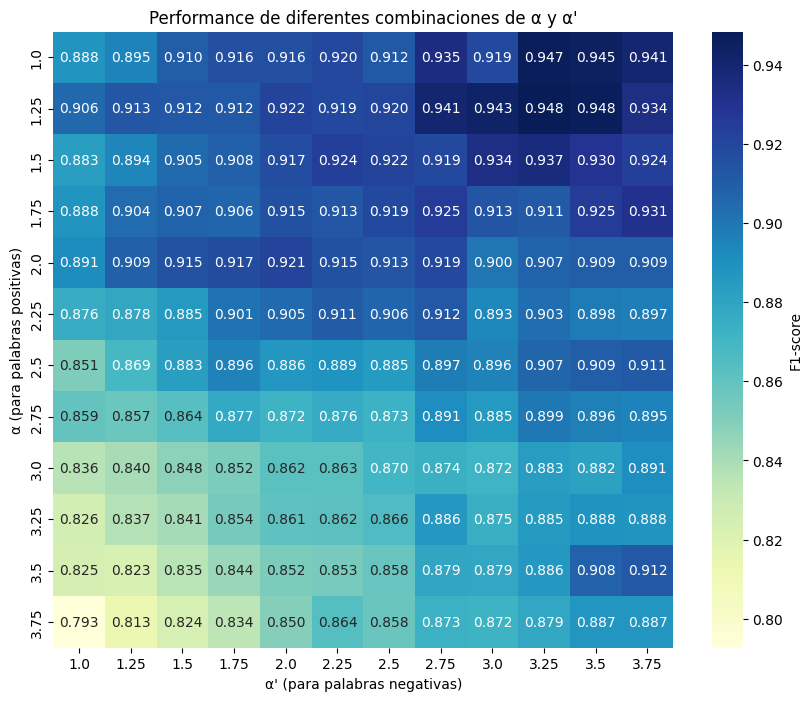

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparamos los datos para el heatmap
heatmap_data = results_df.pivot(index='alpha', columns='alpha_prime', values='f1_score')

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu",
            cbar_kws={'label': 'F1-score'})
plt.title("Performance de diferentes combinaciones de α y α'")
plt.xlabel("α' (para palabras negativas)")
plt.ylabel("α (para palabras positivas)")
plt.show()

In [53]:
# Usando el alpha óptimo encontrado
positive_keywords = [word for word in vocabulary 
                   if word in H_Pj and word in H_Nj 
                   and H_Pj[word] > optimal_alpha * H_Nj[word]]

negative_keywords = [word for word in vocabulary 
                   if word in H_Pj and word in H_Nj 
                   and H_Nj[word] > optimal_alpha * H_Pj[word]]

print(f"Palabras positivas clave ({len(positive_keywords)}):", sorted(positive_keywords)[:20])
print(f"Palabras negativas clave ({len(negative_keywords)}):", sorted(negative_keywords)[:20])

Palabras positivas clave (563): ['15-20', '18th', '2/3', '20-minute', '2006.', '21st', '24-31', '30th', '40', '50', '6am', '8:30', 'absolute', 'absolutely', 'accident', 'accomodating', 'acted', 'activity', 'adagio', 'admit']
Palabras negativas clave (1336): ['..', '1', '10-15', '10:00', '11', '11.', '12', '13', '14', '15', '15.00', '150', '16', '16th', '17', '1st', '2', '2.', '20', '200']


In [54]:
def build_word_frequency(docs):
    """Construye un diccionario de frecuencia total de palabras"""
    word_freq = defaultdict(int)
    for doc in docs:
        for word in doc:
            word_freq[word] += 1
    return word_freq

pos_word_freq = build_word_frequency(positive_docs)
neg_word_freq = build_word_frequency(negative_docs)

In [55]:
# 3. Definir umbral mínimo de ocurrencias
min_occurrences = 5  # Puedes ajustar este valor según necesites

# 4. Filtrar palabras clave positivas
positive_keywords_filtered = [
    word for word in positive_keywords 
    if pos_word_freq.get(word, 0) >= min_occurrences
]

# 5. Filtrar palabras clave negativas
negative_keywords_filtered = [
    word for word in negative_keywords 
    if neg_word_freq.get(word, 0) >= min_occurrences
]

# 6. Mostrar resultados
print(f"\nPalabras positivas clave encontradas ({len(positive_keywords_filtered)}):")
print(sorted(positive_keywords_filtered)[:20])  # Mostrar primeras 20 ordenadas alfabéticamente

print(f"\nPalabras negativas clave encontradas ({len(negative_keywords_filtered)}):")
print(sorted(negative_keywords_filtered)[:20])  # Mostrar primeras 20 ordenadas alfabéticamente

# 7. Opcional: Mostrar palabras clave ordenadas por importancia (diferencia de entropía)
print("\nTop 10 palabras positivas por importancia:")
top_pos = sorted(
    positive_keywords_filtered,
    key=lambda x: H_Pj.get(x, 0) - H_Nj.get(x, 0),
    reverse=True
)[:10]
for word in top_pos:
    print(f"{word}: ΔEntropía = {H_Pj.get(word, 0) - H_Nj.get(word, 0):.2f}")

print("\nTop 10 palabras negativas por importancia:")
top_neg = sorted(
    negative_keywords_filtered,
    key=lambda x: H_Nj.get(x, 0) - H_Pj.get(x, 0),
    reverse=True
)[:10]
for word in top_neg:
    print(f"{word}: ΔEntropía = {H_Nj.get(word, 0) - H_Pj.get(word, 0):.2f}")


Palabras positivas clave encontradas (126):
['absolutely', 'activity', 'adult', 'ala', 'amazing', 'appreciated', 'art', 'attentive', 'awesome', 'barcelona', 'bargain', 'beautiful', 'big', 'blue', 'boat', 'break', 'bus', 'canal', 'cart', 'center']

Palabras negativas clave encontradas (866):
['..', '1', '11', '12', '15', '1st', '2', '2.', '20', '22', '25', '2nd', '3', '30', '35', '3rd', '4', '45', '4th', '5']

Top 10 palabras positivas por importancia:
great: ΔEntropía = 3.15
excellent: ΔEntropía = 3.05
highly: ΔEntropía = 2.01
fantastic: ΔEntropía = 1.95
loved: ΔEntropía = 1.79
wonderful: ΔEntropía = 1.70
helpful: ΔEntropía = 1.30
superb: ΔEntropía = 0.94
florence: ΔEntropía = 0.92
comfortable: ΔEntropía = 0.87

Top 10 palabras negativas por importancia:
not: ΔEntropía = 23.52
no: ΔEntropía = 8.58
can: ΔEntropía = 8.35
good: ΔEntropía = 6.16
small: ΔEntropía = 4.06
ok: ΔEntropía = 3.71
time: ΔEntropía = 3.54
price: ΔEntropía = 3.23
bad: ΔEntropía = 3.18
bed: ΔEntropía = 3.11


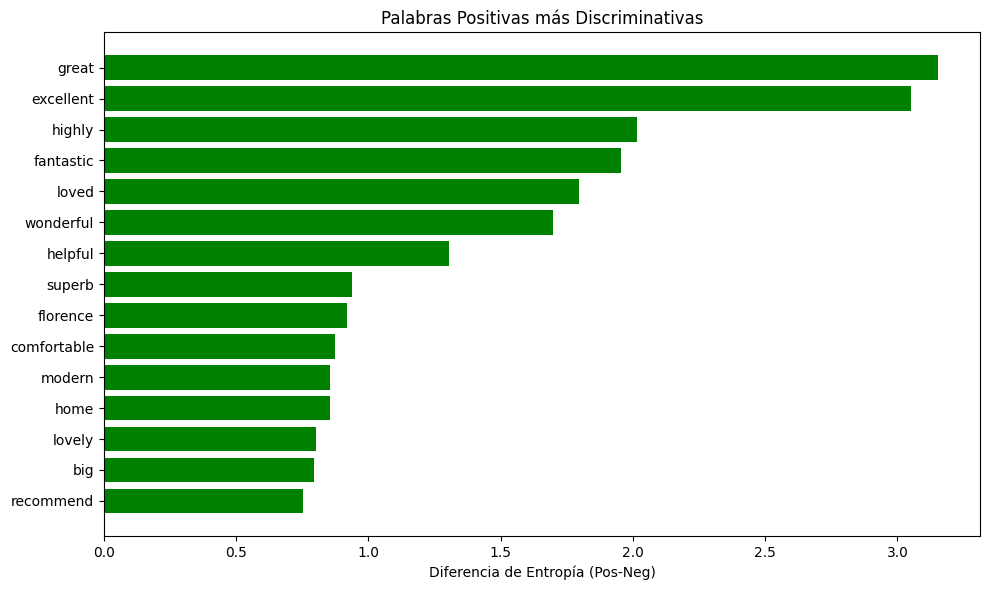

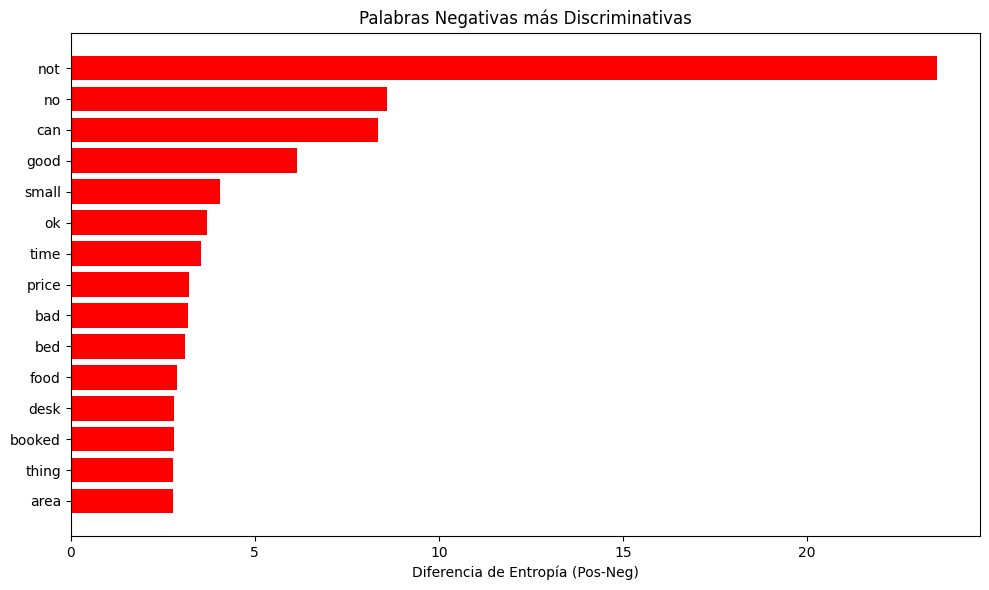

In [56]:
# Visualización de las palabras clave más importantes
import matplotlib.pyplot as plt

def plot_top_words(words, scores, title, color='green'):
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color=color)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Diferencia de Entropía (Pos-Neg)')
    plt.tight_layout()
    plt.show()

# Preparar datos para positivas
top_pos_words = sorted(
    positive_keywords_filtered,
    key=lambda x: H_Pj.get(x, 0) - H_Nj.get(x, 0),
    reverse=True
)[:15]
pos_scores = [H_Pj.get(w, 0) - H_Nj.get(w, 0) for w in top_pos_words]

# Preparar datos para negativas
top_neg_words = sorted(
    negative_keywords_filtered,
    key=lambda x: H_Nj.get(x, 0) - H_Pj.get(x, 0),
    reverse=True
)[:15]
neg_scores = [H_Nj.get(w, 0) - H_Pj.get(w, 0) for w in top_neg_words]

# Graficar
plot_top_words(top_pos_words, pos_scores, 'Palabras Positivas más Discriminativas')
plot_top_words(top_neg_words, neg_scores, 'Palabras Negativas más Discriminativas', 'red')

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear pipeline similar al artículo
final_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        vocabulary=positive_keywords + negative_keywords,
        tokenizer=lambda x: x.split(),
        preprocessor=lambda x: x,
        token_pattern=None,
        binary=True  # Usar representación binaria
    )),
    ('classifier', SVC(
        kernel='linear',
        C=0.5,  # Valor usado en el artículo
        random_state=42
    ))
])

# Entrenar modelo final con todos los datos de entrenamiento
final_pipeline.fit(
    [' '.join(doc) for doc in all_docs],
    [1 if label == 'positive' else 0 for label in all_labels]
)

# Para evaluar en tus datos de prueba:
# y_pred = final_pipeline.predict(test_docs)
# print(classification_report(test_labels, y_pred))

Pipeline(steps=[('vectorizer',
                 CountVectorizer(binary=True,
                                 preprocessor=<function <lambda> at 0x7fef02cc4dc0>,
                                 token_pattern=None,
                                 tokenizer=<function <lambda> at 0x7fef02be7310>,
                                 vocabulary=['smoothly', 'golf', 'yr',
                                             'preferred', 'steak', 'prepare',
                                             '50', 'croissant', 'doorman',
                                             'accomodating', 'rainshowers',
                                             'minus', 'soda', 'counter',
                                             '20-minute', 'yummy', 'definitely',
                                             'surprise', 'tennis', 'st', 'wave',
                                             'uptown', 'spectacular', 'thier',
                                             'explore', 'dam', 'especially',
                                             'refurbishment', 'stroll',
                                             'garden', ...])),
                ('classifier', SVC(C=0.5, kernel='linear', random_state=42))])

In [58]:
from sklearn.metrics import classification_report

# Preprocesar las reseñas de prueba
test_reviews = test_df['Review'].apply(preprocess_text)
test_sentiments = test_df['Sentiment']

# Convertir a formato texto para el vectorizador
X_test = [' '.join(doc) for doc in test_reviews]
y_test = [1 if sentiment == 'positive' else 0 for sentiment in test_sentiments]

# Predecir con el modelo entrenado
y_pred = final_pipeline.predict(X_test)

# Evaluar el rendimiento
print("Reporte de clasificación para datos de prueba:")
print(classification_report(y_test, y_pred))

Reporte de clasificación para datos de prueba:
              precision    recall  f1-score   support

           0       0.46      0.88      0.60      5098
           1       0.94      0.64      0.76     14943

    accuracy                           0.70     20041
   macro avg       0.70      0.76      0.68     20041
weighted avg       0.82      0.70      0.72     20041



In [59]:
def calculate_sentiment_proportions_simple(reviews, positive_keywords, negative_keywords):
    """
    Versión simplificada que cuenta palabras clave directamente
    """
    results = []
    
    for review in reviews:
        # Contar palabras clave positivas y negativas
        pos_count = sum(1 for word in review if word in positive_keywords)
        neg_count = sum(1 for word in review if word in negative_keywords)
        total_words = len(review)
        
        # Calcular ratios (con protección contra división por cero)
        total = pos_count + neg_count
        if total > 0:
            positive_ratio = pos_count / total
            negative_ratio = neg_count / total
        else:
            positive_ratio = 0.0
            negative_ratio = 0.0
        
        results.append({
            'positive_words': pos_count,
            'negative_words': neg_count,
            'total_words': total_words,
            'positive_ratio': positive_ratio,
            'negative_ratio': negative_ratio
        })
    
    return pd.DataFrame(results)

sentiment_proportions = calculate_sentiment_proportions_simple(
    test_reviews.tolist(),
    positive_keywords_filtered,
    negative_keywords_filtered
)

In [60]:
sentiment_proportions

,positive_words,negative_words,total_words,positive_ratio,negative_ratio
0,4,54,83,0.068966,0.931034
1,4,144,249,0.027027,0.972973
2,10,125,221,0.074074,0.925926
3,8,40,89,0.166667,0.833333
4,13,107,189,0.108333,0.891667
...,...,...,...,...,...
20036,3,55,110,0.051724,0.948276
20037,9,18,43,0.333333,0.666667
20038,1,32,64,0.030303,0.969697
20039,30,337,790,0.081744,0.918256


In [61]:
test_df

,Review,Rating,train,Sentiment
0,nice hotel expensive parking got good deal sta...,4,False,positive
1,ok nothing special charge diamond member hilto...,2,False,negative
2,nice rooms not 4* experience hotel monaco seat...,3,False,negative
3,"unique, great stay, wonderful time hotel monac...",5,False,positive
4,"great stay great stay, went seahawk game aweso...",5,False,positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,False,positive
20487,great location price view hotel great quick pl...,4,False,positive
20488,"ok just looks nice modern outside, desk staff ...",2,False,negative
20489,hotel theft ruined vacation hotel opened sept ...,1,False,negative


In [62]:
# Añadir las puntuaciones originales al DataFrame de proporciones
sentiment_proportions['rating'] = test_df['Rating'].values

# Mostrar estructura de los datos
print("Estructura de los datos para análisis de correlación:")
print(sentiment_proportions.head())

Estructura de los datos para análisis de correlación:
   positive_words  negative_words  total_words  positive_ratio  \
0               4              54           83        0.068966   
1               4             144          249        0.027027   
2              10             125          221        0.074074   
3               8              40           89        0.166667   
4              13             107          189        0.108333   

   negative_ratio  rating  
0        0.931034       4  
1        0.972973       2  
2        0.925926       3  
3        0.833333       5  
4        0.891667       5  


In [63]:
from scipy.stats import spearmanr, kendalltau
from minepy import MINE

def calculate_correlations(df):
    
    # Spearman (ρ)
    spear_pos = spearmanr(df['positive_ratio'], df['rating'])
    spear_neg = spearmanr(df['negative_ratio'], df['rating'])
    
    # Kendall (τ)
    kendall_pos = kendalltau(df['positive_ratio'], df['rating'])
    kendall_neg = kendalltau(df['negative_ratio'], df['rating'])
    
    # MIC (Maximal Information Coefficient)
    mine = MINE()
    mine.compute_score(df['positive_ratio'], df['rating'])
    mic_pos = mine.mic()
    
    mine.compute_score(df['negative_ratio'], df['rating'])
    mic_neg = mine.mic()
    
    return {
        'spearman_positive': {'coef': spear_pos.correlation, 'pvalue': spear_pos.pvalue},
        'spearman_negative': {'coef': spear_neg.correlation, 'pvalue': spear_neg.pvalue},
        'kendall_positive': {'coef': kendall_pos.correlation, 'pvalue': kendall_pos.pvalue},
        'kendall_negative': {'coef': kendall_neg.correlation, 'pvalue': kendall_neg.pvalue},
        'mic_positive': mic_pos,
        'mic_negative': mic_neg
    }



In [64]:
# Calcular correlaciones
correlation_results = calculate_correlations(sentiment_proportions)

# Mostrar resultados en formato de tabla
print("\nResultados de Correlación:")
print("{:<25} {:<15} {:<15}".format('Métrica', 'Positive Ratio', 'Negative Ratio'))
print("-" * 55)
print("{:<25} {:<15.3f} {:<15.3f}".format(
    "Spearman's ρ", 
    correlation_results['spearman_positive']['coef'], 
    correlation_results['spearman_negative']['coef']
))
print("{:<25} {:<15.3f} {:<15.3f}".format(
    "Kendall's τ", 
    correlation_results['kendall_positive']['coef'], 
    correlation_results['kendall_negative']['coef']
))
print("{:<25} {:<15.3f} {:<15.3f}".format(
    "MIC", 
    correlation_results['mic_positive'], 
    correlation_results['mic_negative']
))


Resultados de Correlación:
Métrica                   Positive Ratio  Negative Ratio 
-------------------------------------------------------
Spearman's ρ              0.576           -0.576         
Kendall's τ               0.452           -0.452         
MIC                       0.277           0.276          


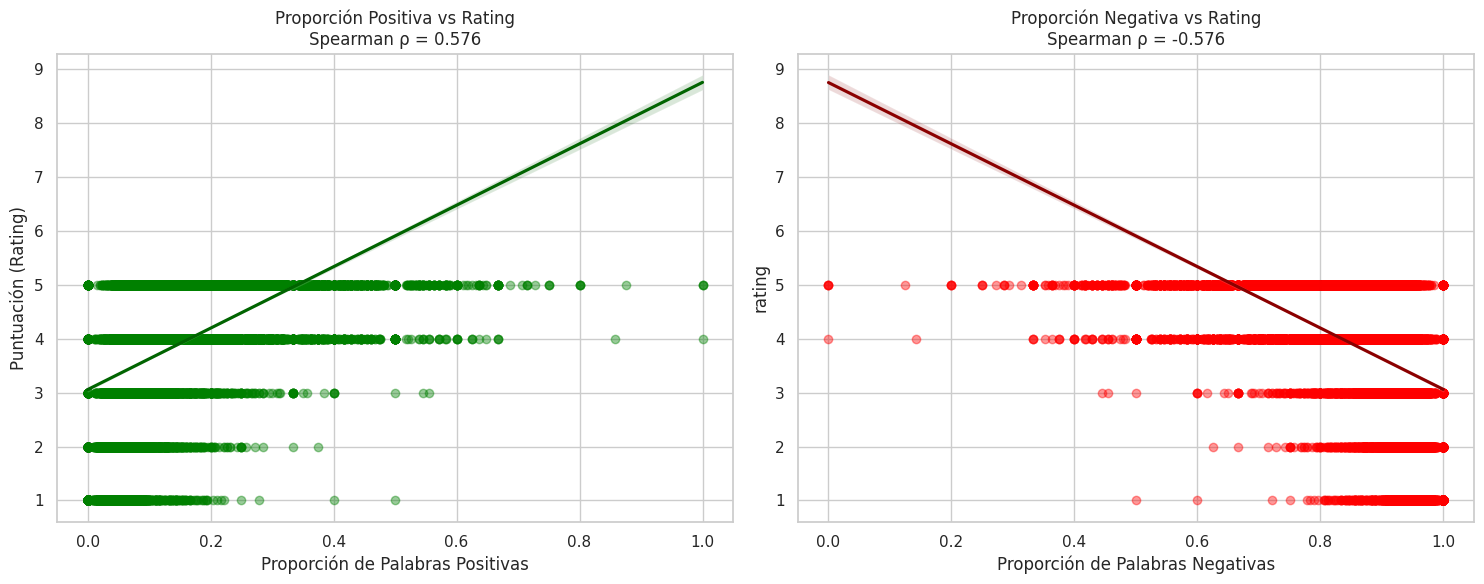

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(
    x='positive_ratio', 
    y='rating', 
    data=sentiment_proportions,
    scatter_kws={'alpha':0.4, 'color':'green'},
    line_kws={'color':'darkgreen'}
)
plt.title(f"Proporción Positiva vs Rating\nSpearman ρ = {correlation_results['spearman_positive']['coef']:.3f}")
plt.xlabel("Proporción de Palabras Positivas")
plt.ylabel("Puntuación (Rating)")

plt.subplot(1, 2, 2)
sns.regplot(
    x='negative_ratio', 
    y='rating', 
    data=sentiment_proportions,
    scatter_kws={'alpha':0.4, 'color':'red'},
    line_kws={'color':'darkred'}
)
plt.title(f"Proporción Negativa vs Rating\nSpearman ρ = {correlation_results['spearman_negative']['coef']:.3f}")
plt.xlabel("Proporción de Palabras Negativas")

plt.tight_layout()
plt.show()

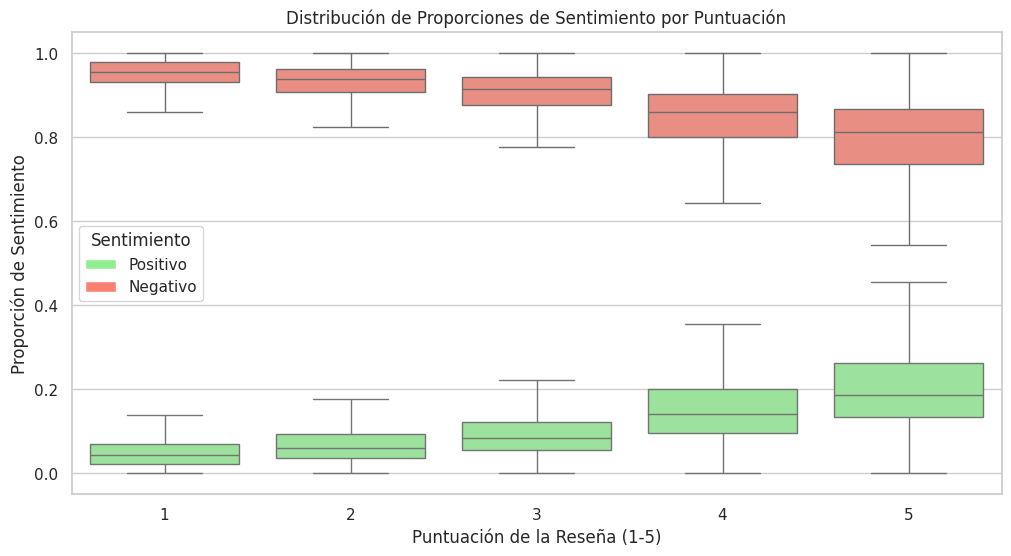

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='rating',
    y='positive_ratio',
    data=sentiment_proportions,
    color='lightgreen',
    showfliers=False
)
sns.boxplot(
    x='rating',
    y='negative_ratio',
    data=sentiment_proportions,
    color='salmon',
    showfliers=False
)
plt.title("Distribución de Proporciones de Sentimiento por Puntuación")
plt.xlabel("Puntuación de la Reseña (1-5)")
plt.ylabel("Proporción de Sentimiento")
plt.legend(
    handles=[
        plt.Rectangle((0,0),1,1,fc='lightgreen', label='Positivo'),
        plt.Rectangle((0,0),1,1,fc='salmon', label='Negativo')
    ],
    title='Sentimiento'
)
plt.show()